<a href="https://colab.research.google.com/github/AquaIsLove/Neural-networks/blob/main/Main2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [ ]:
class LinearRegression():

  def __init__(self, lr, epochs, w=random.uniform(0,1)):
    self.lr = lr
    self.epochs = epochs
    self.w = w
    self.w_first = w

  def fit(self, X, Y):
    for e in range(self.epochs):
      for x, y in zip(X, Y):
        y_new = self.w * x
        E = y - y_new
        self.w = self.w + self.lr * (E/x)

  def predict(self, X):
    return [self.w*x for x in X]

  def MSE(self,X,Y):
    res = 0
    for i in range(len(X)):
      res+=(Y[i] - (self.predict(X))[i])**2
    res/=len(X)
    return res

  def MAE(self,X,Y):
    res = 0
    for i in range(len(X)):
      res += abs(Y[i] - (self.predict(X))[i])
    res/=len(X)
    return res

In [ ]:
lr = 0.001

epochs = 3000

w = 0.4

X_train = [6.3,8,9.8,14.2,16,17.3,23]
Y_train = [40,60,90.1,137,117,130.9,154.1]

X_test = [12.7,20]
Y_test = [115,146]

In [ ]:
fuel_rate = LinearRegression(lr,epochs,w)
fuel_rate.fit(X_train,Y_train)

print(f"Начальное значение коэффициента: w = {fuel_rate.w_first}")

print(f"Получившиееся значение коэффициента: w = {fuel_rate.w}")

Начальное значение коэффициента: w = 0.4
Получившиееся значение коэффициента: w = 7.752748190872693


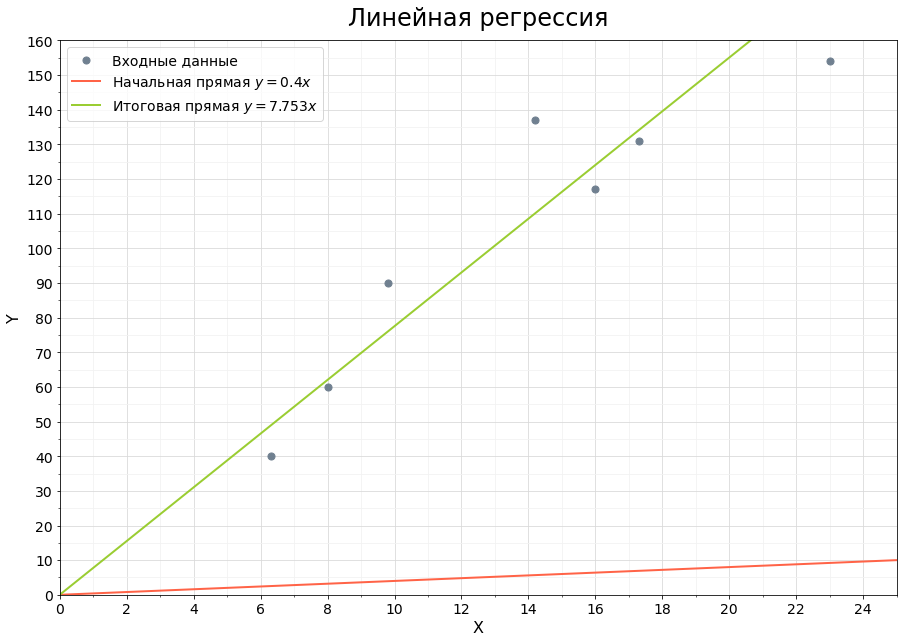

In [ ]:

xlim = (0, 25)
ylim = (0, 160)

fig, ax = plt.subplots(figsize=(15,10), dpi=72)
ax.set_title('Линейная регрессия', pad='15', fontsize=24)

ax.set_xlabel('X', fontsize=16)
ax.set_ylabel('Y', fontsize=16)

ax.set(xlim=xlim, ylim=ylim)

ax.tick_params(axis='both', labelsize=14)
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))

ax.grid(True, color='0.85', linestyle='-')
ax.grid(which='minor', color='0.95', linestyle='-')

ax.scatter(X_train, Y_train,
           color='slategrey', 
           s=50, zorder=2,
           label='Входные данные')

ax.plot(xlim, [fuel_rate.w_first*x for x in xlim], 
        'tomato', linewidth=2, 
        label=f'Начальная прямая $y = {fuel_rate.w_first}x$')

ax.plot(xlim, fuel_rate.predict(xlim), 
        'yellowgreen', linewidth=2, 
        label=f'Итоговая прямая $y = {round(fuel_rate.w, 3)}x$')

ax.legend(loc='best', fontsize=14)

plt.show()

In [ ]:
print(fuel_rate.MSE(X_test,Y_test))

print(fuel_rate.MAE(X_test,Y_test))

177.78360539416286
12.79753089668533
